In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
stocks_data = pd.read_csv("all_stocks_5yr.csv")

#Let's take 5 financial companies

financial_companies = ['JPM', 'BAC','GS']

# Filter the data to include only the selected financial companies
financial_stock_data = stocks_data[stocks_data['Name'].isin(financial_companies)]
financial_stock_data

,date,open,high,low,close,volume,Name
72870,2013-02-08,11.86,11.900,11.720,11.760,145217221,BAC
72871,2013-02-11,11.73,11.900,11.670,11.860,103499848,BAC
72872,2013-02-12,11.87,12.340,11.780,12.245,231771561,BAC
72873,2013-02-13,12.35,12.420,12.050,12.170,192478919,BAC
72874,2013-02-14,12.09,12.270,12.070,12.130,143901737,BAC
...,...,...,...,...,...,...,...
320293,2018-02-01,115.77,116.985,115.480,116.870,13800613,JPM
320294,2018-02-02,116.49,116.920,114.090,114.280,16477307,JPM
320295,2018-02-05,113.00,114.590,103.980,108.800,30097591,JPM
320296,2018-02-06,106.85,112.480,106.610,112.110,33114833,JPM


In [42]:
import pandas as pd

# Convert the date column to datetime format
financial_stock_data["date"] = pd.to_datetime(financial_stock_data["date"])

def fill_missing_dates(df):
    # Create a business day range
    full_date_range = pd.date_range(start=df["date"].min(), end=df["date"].max(), freq='B')

    # Reindex the DataFrame to the business day range
    df = df.set_index("date").reindex(full_date_range).rename_axis("date").reset_index()

    # Forward fill the missing values
    df[["Name","close"]] = df[["Name","close"]].fillna(method="ffill")
    return df

# Apply the function to each group
finance_continuous_data = financial_stock_data.groupby(["Name"]).apply(fill_missing_dates).reset_index(drop=True)

# Keep only the desired columns
finance_continuous_data = finance_continuous_data[["date", "close", "Name"]]

# Check for any remaining missing values
missing_values = finance_continuous_data.isna().sum()
print(missing_values)

date     0
close    0
Name     0
dtype: int64


C:\Users\aishp\AppData\Local\Temp\ipykernel_14672\3582266552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_stock_data["date"] = pd.to_datetime(financial_stock_data["date"])
C:\Users\aishp\AppData\Local\Temp\ipykernel_14672\3582266552.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[["Name","close"]] = df[["Name","close"]].fillna(method="ffill")
C:\Users\aishp\AppData\Local\Temp\ipykernel_14672\3582266552.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[["Name","close"]] = df[["Name","close"]].fillna(method="ffill")
C:\Users\aishp\AppDat

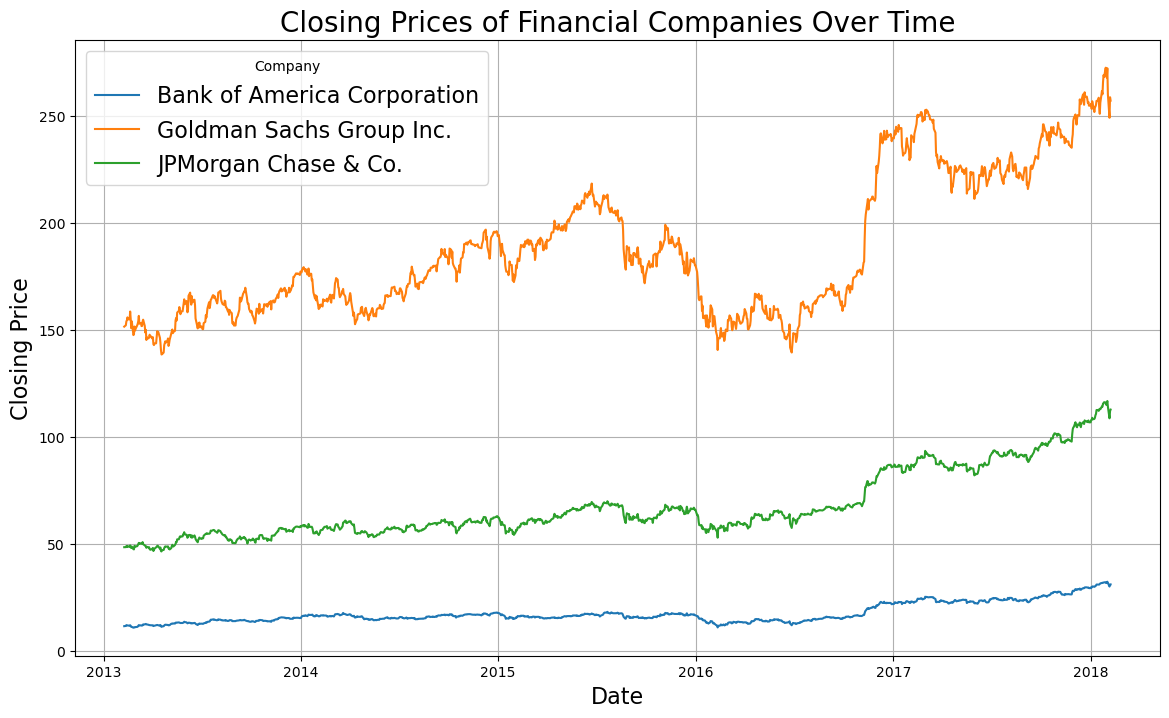

In [43]:
import matplotlib.pyplot as plt

# Mapping from ticker symbols to full company names
company_names = {
    'JPM': 'JPMorgan Chase & Co.',
    'BAC': 'Bank of America Corporation',
    'GS': 'Goldman Sachs Group Inc.'
}

# Set the date as the index
finance_continuous_data.set_index("date", inplace=True)

# Plot the close prices for each company
plt.figure(figsize=(14, 8))  # Set the figure size
for name, group in finance_continuous_data.groupby("Name"):
    plt.plot(group.index, group["close"], label=company_names.get(name, name))  # Use full company names

# Add legend, title, and labels
plt.legend(title='Company', fontsize=16)
plt.title('Closing Prices of Financial Companies Over Time', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Closing Price', fontsize=16)
plt.grid(True)  # Add grid for better readability

# Show the plot
plt.show()


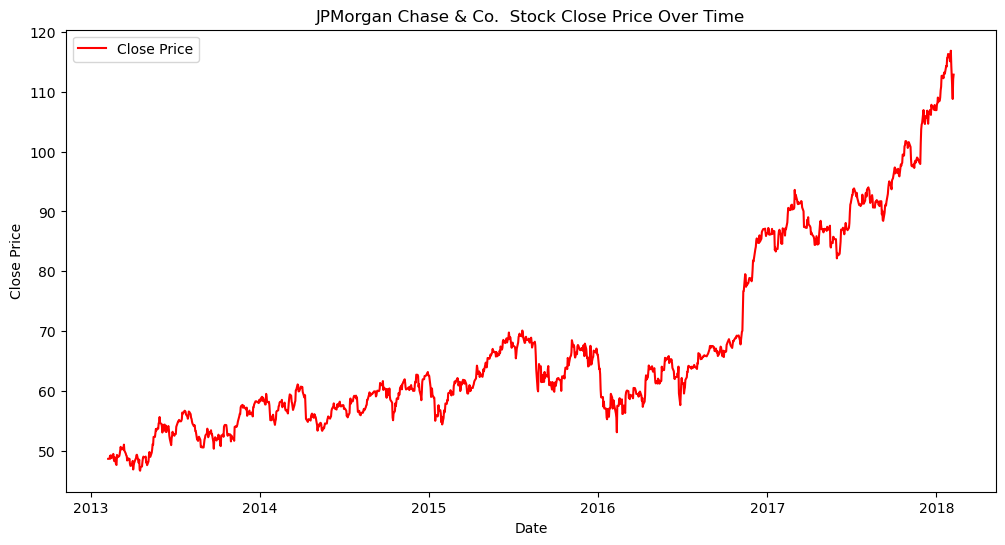

In [44]:
#lets take JPM company from data

jpm_df = finance_continuous_data[finance_continuous_data["Name"]=="JPM"][["close"]]
plt.figure(figsize=(12, 6))
plt.plot(jpm_df,label='Close Price',color="Red")
plt.title('JPMorgan Chase & Co.  Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [45]:
jpm_df

,close
date,
2013-02-08,48.63
2013-02-11,48.66
2013-02-12,49.14
2013-02-13,48.68
2013-02-14,49.22
...,...
2018-02-01,116.87
2018-02-02,114.28
2018-02-05,108.80


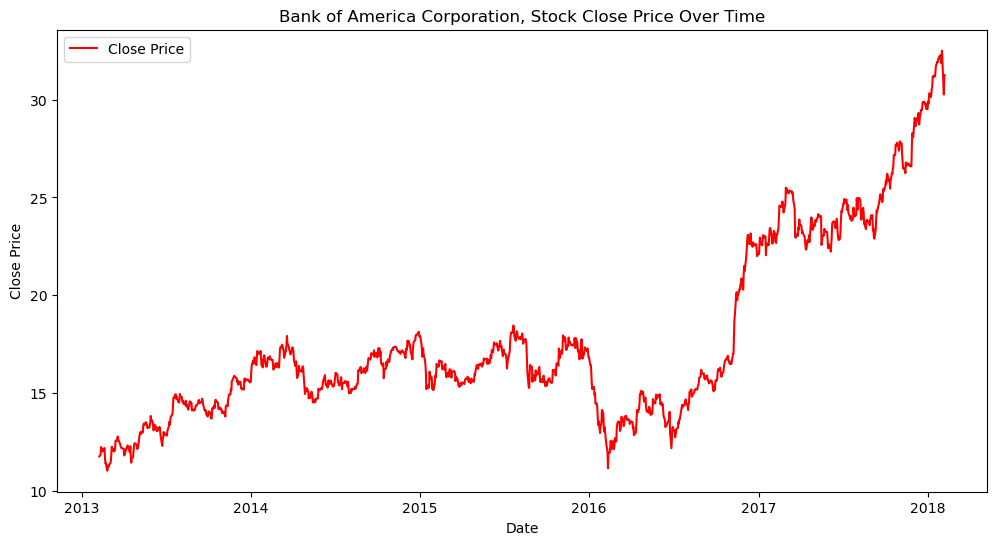

In [46]:
#lets take JPM company from data

bac_df = finance_continuous_data[finance_continuous_data["Name"]=="BAC"][["close"]]
plt.figure(figsize=(12, 6))
plt.plot(bac_df,label='Close Price',color="Red")
plt.title('Bank of America Corporation, Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [47]:
bac_df

,close
date,
2013-02-08,11.760
2013-02-11,11.860
2013-02-12,12.245
2013-02-13,12.170
2013-02-14,12.130
...,...
2018-02-01,32.500
2018-02-02,31.950
2018-02-05,30.260


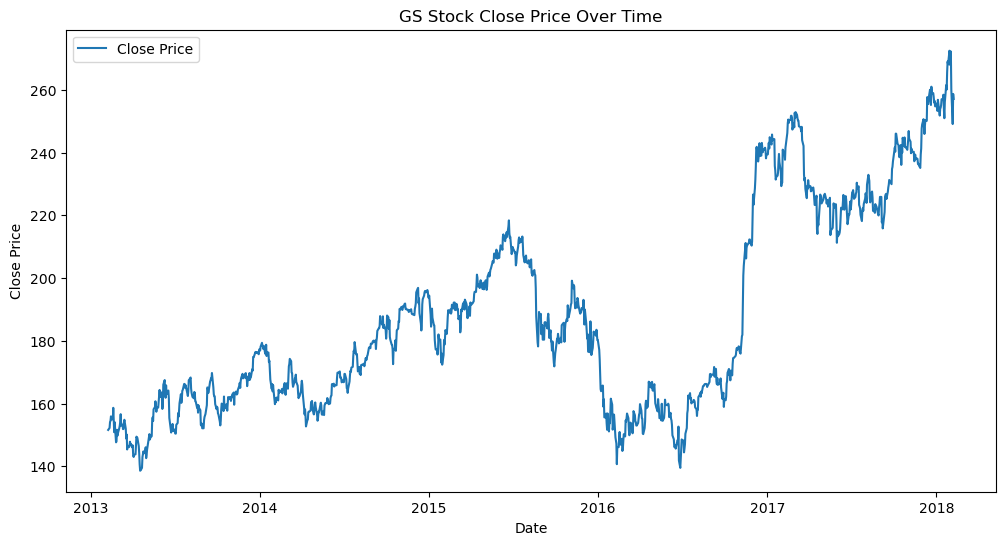

In [48]:
gs_df = finance_continuous_data[finance_continuous_data["Name"]=="GS"][["close"]]
plt.figure(figsize=(12, 6))
plt.plot(gs_df,label='Close Price')
plt.title('GS Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [49]:
gs_df

,close
date,
2013-02-08,151.60
2013-02-11,152.24
2013-02-12,154.11
2013-02-13,154.52
2013-02-14,155.93
...,...
2018-02-01,272.23
2018-02-02,260.04
2018-02-05,249.11


In [50]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

def lstm_prediction(df,company_name):
    shape = df.shape[0]
    df_new = df[["close"]]
    dataset = df_new.values
    
    train = df_new[:'2017-12-31']
    valid = df_new['2017-12-31':]
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    
    x_train, y_train = [], []
    for i in range(40, len(train)):
        x_train.append(scaled_data[i-40:i, 0])
        y_train.append(scaled_data[i, 0])
    
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    
    # Fit the model and store the history
    history = model.fit(x_train, y_train, epochs=50, batch_size=16, verbose=2)
    
    # Plot the model loss and accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Loss', linewidth=2)
    plt.plot(history.history['accuracy'], label='Accuracy', linewidth=2)
    plt.title('Model Loss and Accuracy Over Epochs', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss/Accuracy', fontsize=16)
    plt.legend(fontsize=14)
    plt.show()
    
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    
    X_test = []
    for i in range(40, inputs.shape[0]):
        X_test.append(inputs[i-40:i, 0])
    
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    # Calculate RMSE, MAE, and MAPE for the validation set
    rms = np.sqrt(np.mean(np.power((valid.values - closing_price), 2)))
    mae = np.mean(np.abs(valid.values - closing_price))
    mape = np.mean(np.abs((valid.values - closing_price) / valid.values)) * 100
    
    print(f'RMSE on validation set: {rms}')
    print(f'MAE on validation set: {mae}')
    print(f'MAPE on validation set: {mape}%')
    
    valid['Predictions'] = closing_price
    
    plt.plot(valid[['close', 'Predictions']], linewidth=2)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Stock Price', fontsize=16)
    plt.title(company_name+' Test Data Stock Price Prediction by Long Short Term Memory (LSTM)', fontsize=20)
    plt.legend(['Actual Validation Data', 'Predicted Validation Data'], fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
    plt.plot(train['close'], linewidth=2)
    plt.plot(valid[['close', 'Predictions']], linewidth=2)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Stock Price', fontsize=16)
    plt.title(company_name+' Stock Price Prediction by Long Short Term Memory (LSTM)', fontsize=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'], fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
    # Forecasting the next 60 days
    last_40_days = inputs[-40:]  # Get the last 40 days of data
    forecast_60_days = []

    for _ in range(60):
        X_input = last_40_days[-40:].reshape(1, 40, 1)
        next_pred = model.predict(X_input)
        forecast_60_days.append(next_pred[0, 0])
        last_40_days = np.append(last_40_days, next_pred)[-40:]
    
    forecast_60_days = scaler.inverse_transform(np.array(forecast_60_days).reshape(-1, 1))
    
    # Creating a date range for the forecast
    last_date = df_new.index[-1]
    forecast_dates = pd.date_range(start=last_date, periods=61, inclusive='right')
    
    forecast_df = pd.DataFrame(forecast_60_days, columns=['Forecast'], index=forecast_dates)
    
    # Calculate confidence intervals
    forecast_std = np.std(forecast_60_days)
    forecast_df['Lower CI'] = forecast_df['Forecast'] - 1.96 * forecast_std
    forecast_df['Upper CI'] = forecast_df['Forecast'] + 1.96 * forecast_std
    
    # Print the future 60-day forecasted values with confidence intervals
    print("Future 60-Day Forecasted Values with Confidence Intervals:")
    print(forecast_df[['Forecast', 'Lower CI', 'Upper CI']])

    plt.figure(figsize=(12, 6))
    plt.plot(df_new['close'], label='Historical Data', linewidth=2)
    plt.plot(valid.index, valid['Predictions'], label='Validation Predictions', linewidth=2)
    plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast for Next 60 Days', linewidth=2)
    plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='r', alpha=0.3)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Stock Price', fontsize=16)
    plt.title(company_name+' Stock Price Forecast for Next 60 Days', fontsize=20)
    plt.legend(fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
    return forecast_df, rms


Epoch 1/50


C:\Users\aishp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


78/78 - 8s - 102ms/step - accuracy: 8.0906e-04 - loss: 0.0091
Epoch 2/50
78/78 - 2s - 31ms/step - accuracy: 8.0906e-04 - loss: 8.3510e-04
Epoch 3/50
78/78 - 3s - 35ms/step - accuracy: 8.0906e-04 - loss: 7.5025e-04
Epoch 4/50
78/78 - 2s - 25ms/step - accuracy: 8.0906e-04 - loss: 6.8227e-04
Epoch 5/50
78/78 - 2s - 31ms/step - accuracy: 8.0906e-04 - loss: 6.9597e-04
Epoch 6/50
78/78 - 3s - 44ms/step - accuracy: 8.0906e-04 - loss: 7.2119e-04
Epoch 7/50
78/78 - 4s - 50ms/step - accuracy: 8.0906e-04 - loss: 5.6979e-04
Epoch 8/50
78/78 - 3s - 44ms/step - accuracy: 8.0906e-04 - loss: 5.3276e-04
Epoch 9/50
78/78 - 6s - 79ms/step - accuracy: 8.0906e-04 - loss: 5.2231e-04
Epoch 10/50
78/78 - 5s - 59ms/step - accuracy: 8.0906e-04 - loss: 4.4050e-04
Epoch 11/50
78/78 - 3s - 35ms/step - accuracy: 8.0906e-04 - loss: 4.5524e-04
Epoch 12/50
78/78 - 3s - 35ms/step - accuracy: 8.0906e-04 - loss: 3.8796e-04
Epoch 13/50
78/78 - 3s - 41ms/step - accuracy: 8.0906e-04 - loss: 3.7401e-04
Epoch 14/50
78/78 - 5s

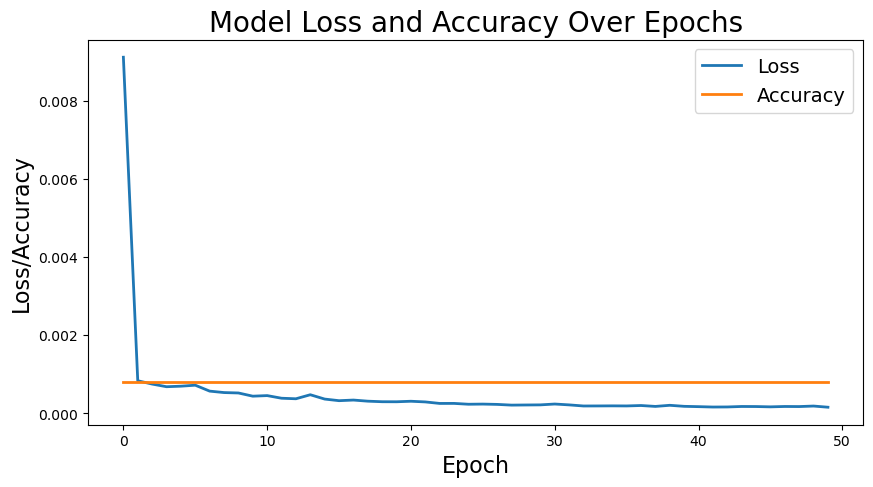

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
RMSE on validation set: 1.5910390672229693
MAE on validation set: 1.08589614868164
MAPE on validation set: 0.9677718069276527%


C:\Users\aishp\AppData\Local\Temp\ipykernel_14672\1795991274.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


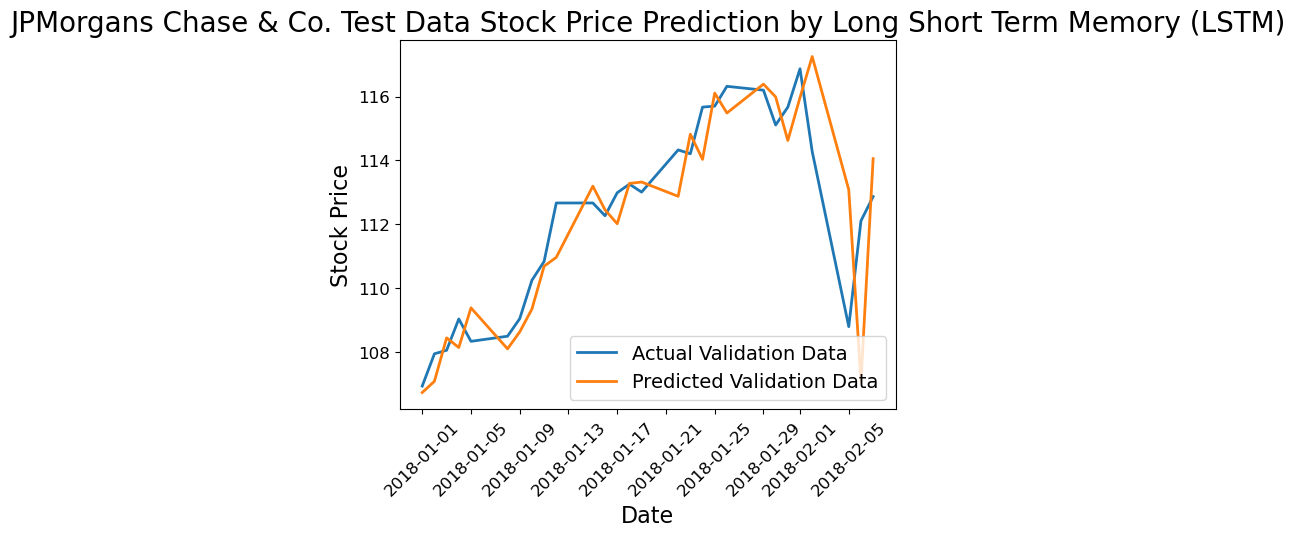

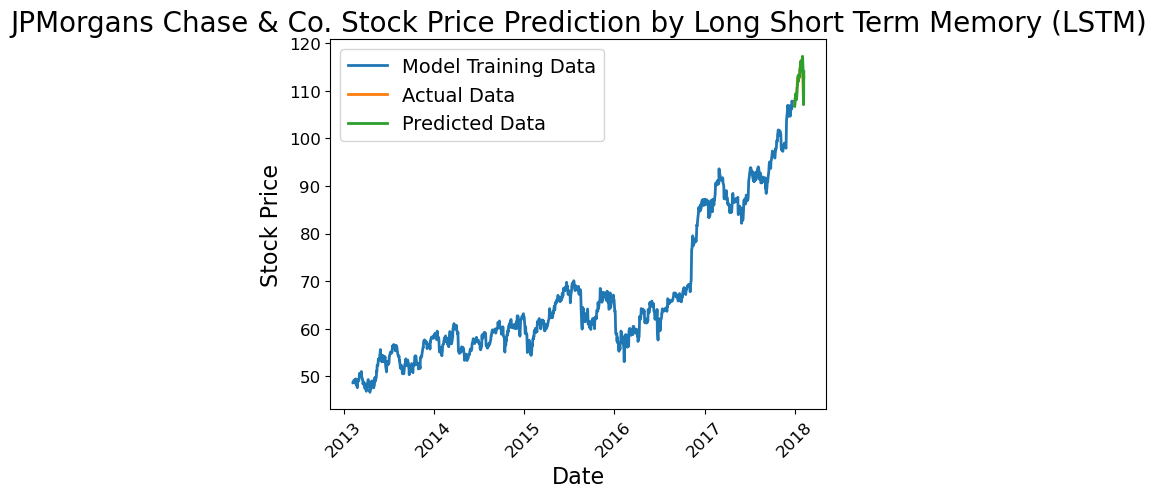

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━

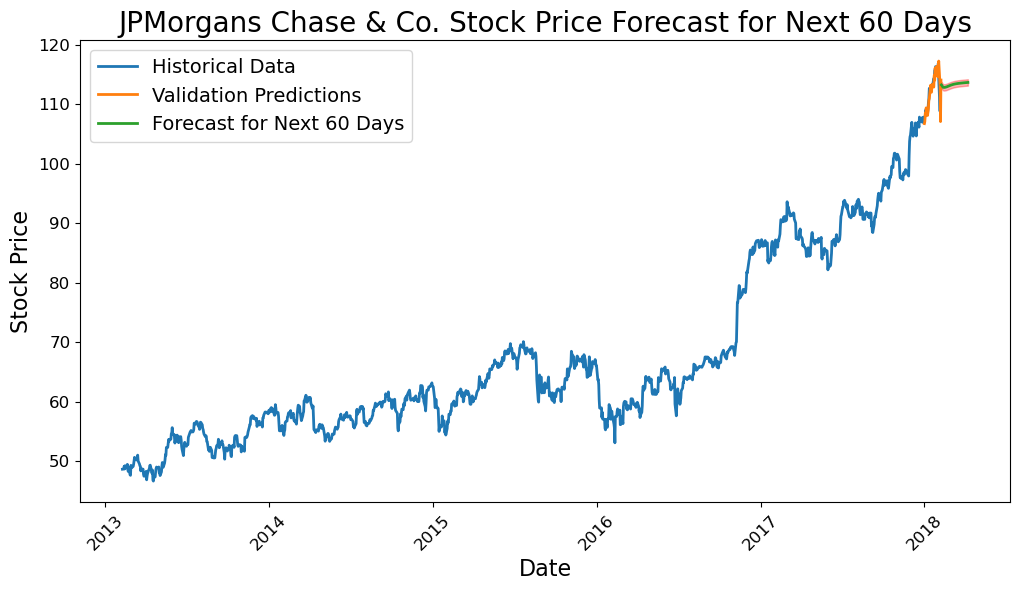

In [51]:
forecast_df, rms = lstm_prediction(jpm_df,"JPMorgans Chase & Co.")

Epoch 1/50


C:\Users\aishp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


78/78 - 9s - 121ms/step - accuracy: 0.0000e+00 - loss: 0.0073
Epoch 2/50
78/78 - 2s - 32ms/step - accuracy: 0.0000e+00 - loss: 9.7389e-04
Epoch 3/50
78/78 - 2s - 28ms/step - accuracy: 0.0000e+00 - loss: 9.0716e-04
Epoch 4/50
78/78 - 3s - 33ms/step - accuracy: 0.0000e+00 - loss: 8.6382e-04
Epoch 5/50
78/78 - 2s - 24ms/step - accuracy: 0.0000e+00 - loss: 7.6309e-04
Epoch 6/50
78/78 - 2s - 30ms/step - accuracy: 0.0000e+00 - loss: 7.3124e-04
Epoch 7/50
78/78 - 3s - 41ms/step - accuracy: 0.0000e+00 - loss: 7.4070e-04
Epoch 8/50
78/78 - 2s - 30ms/step - accuracy: 0.0000e+00 - loss: 5.9266e-04
Epoch 9/50
78/78 - 3s - 35ms/step - accuracy: 0.0000e+00 - loss: 5.5580e-04
Epoch 10/50
78/78 - 3s - 39ms/step - accuracy: 0.0000e+00 - loss: 5.8142e-04
Epoch 11/50
78/78 - 2s - 28ms/step - accuracy: 0.0000e+00 - loss: 5.1329e-04
Epoch 12/50
78/78 - 2s - 30ms/step - accuracy: 0.0000e+00 - loss: 5.9681e-04
Epoch 13/50
78/78 - 4s - 51ms/step - accuracy: 0.0000e+00 - loss: 4.4723e-04
Epoch 14/50
78/78 - 4s

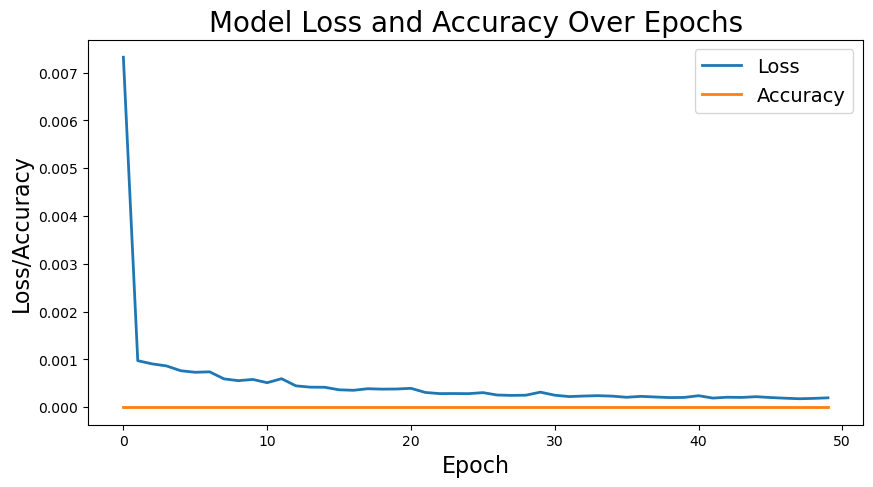

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
RMSE on validation set: 0.9997152015050025
MAE on validation set: 0.9041490554809565
MAPE on validation set: 2.903639147116913%


C:\Users\aishp\AppData\Local\Temp\ipykernel_14672\1795991274.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


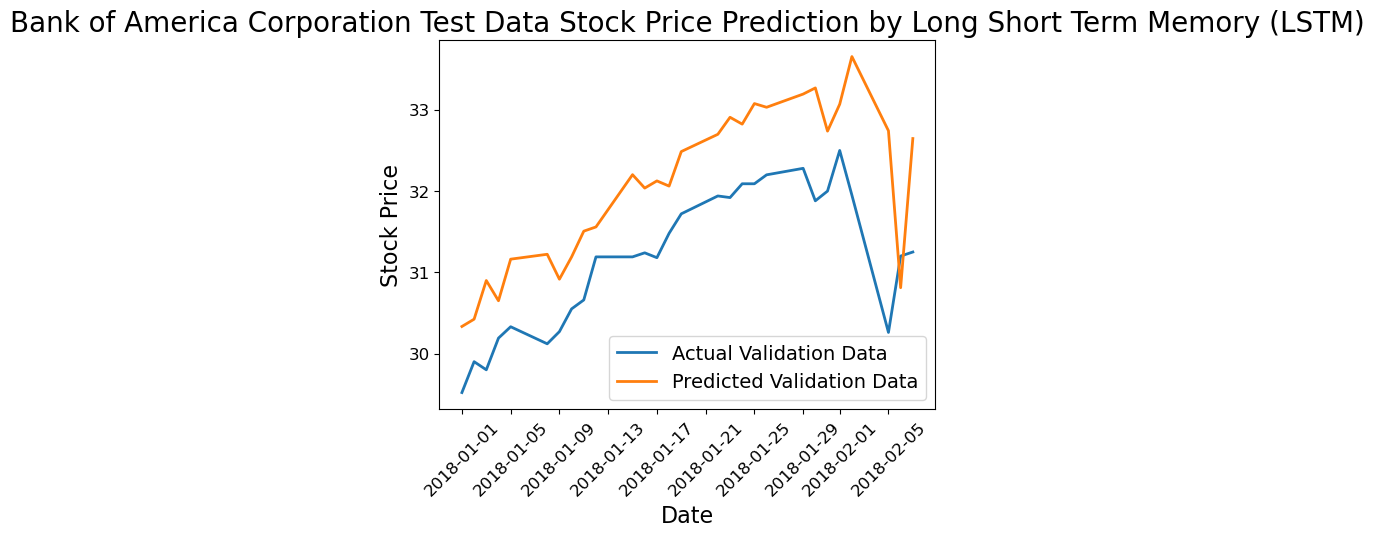

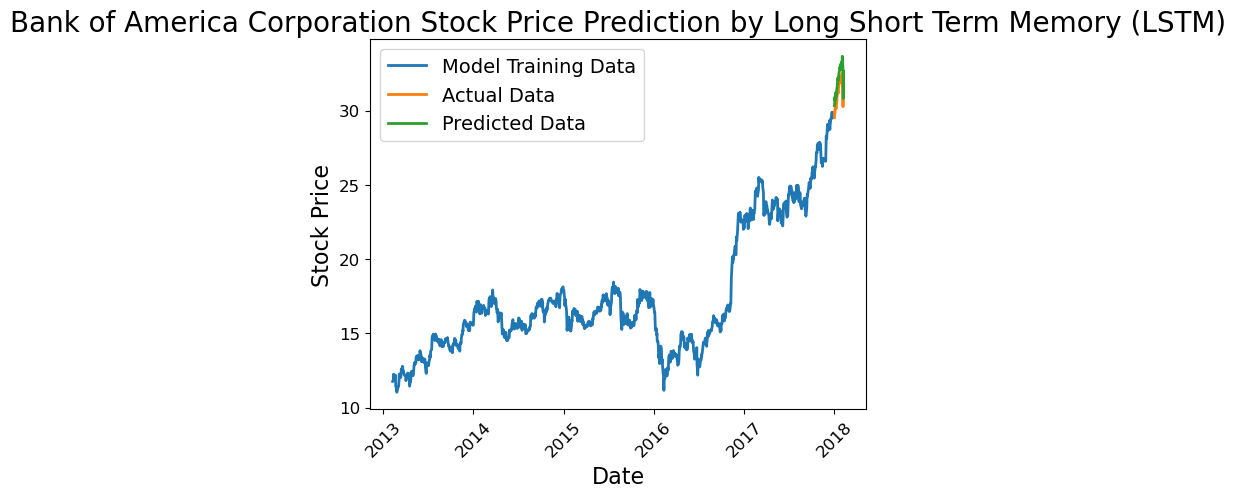

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━

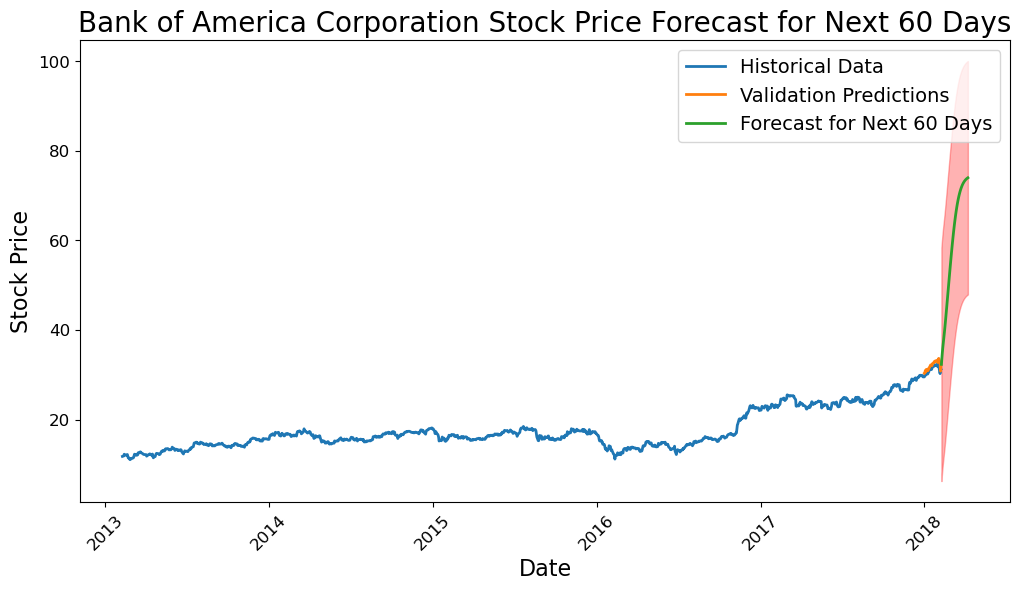

In [13]:
forecast_df, rms = lstm_prediction(bac_df, "Bank of America Corporation")

Epoch 1/50


C:\Users\aishp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


78/78 - 9s - 114ms/step - accuracy: 8.0906e-04 - loss: 0.0102
Epoch 2/50
78/78 - 2s - 29ms/step - accuracy: 8.0906e-04 - loss: 0.0019
Epoch 3/50
78/78 - 2s - 29ms/step - accuracy: 8.0906e-04 - loss: 0.0016
Epoch 4/50
78/78 - 2s - 25ms/step - accuracy: 8.0906e-04 - loss: 0.0015
Epoch 5/50
78/78 - 2s - 27ms/step - accuracy: 8.0906e-04 - loss: 0.0013
Epoch 6/50
78/78 - 3s - 34ms/step - accuracy: 8.0906e-04 - loss: 0.0012
Epoch 7/50
78/78 - 2s - 25ms/step - accuracy: 8.0906e-04 - loss: 0.0012
Epoch 8/50
78/78 - 2s - 31ms/step - accuracy: 8.0906e-04 - loss: 0.0011
Epoch 9/50
78/78 - 2s - 29ms/step - accuracy: 8.0906e-04 - loss: 9.7080e-04
Epoch 10/50
78/78 - 3s - 34ms/step - accuracy: 8.0906e-04 - loss: 0.0011
Epoch 11/50
78/78 - 2s - 29ms/step - accuracy: 8.0906e-04 - loss: 9.5726e-04
Epoch 12/50
78/78 - 3s - 34ms/step - accuracy: 8.0906e-04 - loss: 8.3904e-04
Epoch 13/50
78/78 - 2s - 27ms/step - accuracy: 8.0906e-04 - loss: 7.9496e-04
Epoch 14/50
78/78 - 3s - 32ms/step - accuracy: 8.0906e

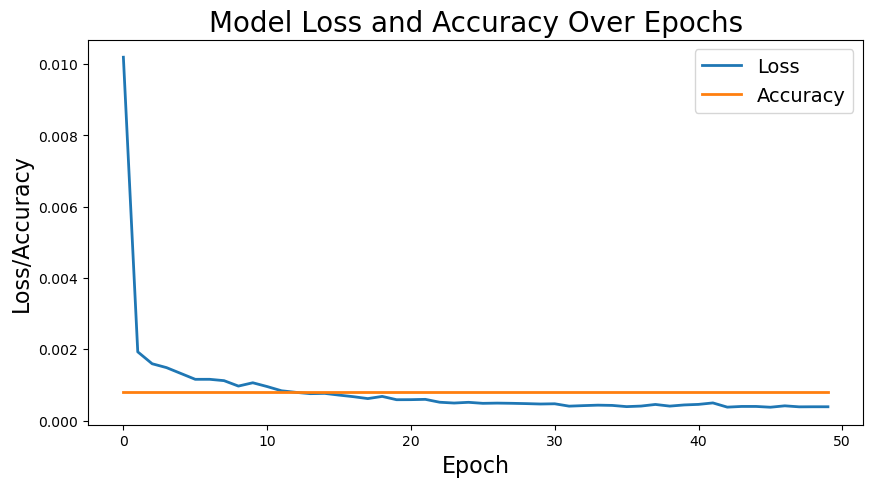

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
RMSE on validation set: 4.793761295611674
MAE on validation set: 3.5979976545061345
MAPE on validation set: 1.388404955443317%


C:\Users\aishp\AppData\Local\Temp\ipykernel_14672\1795991274.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


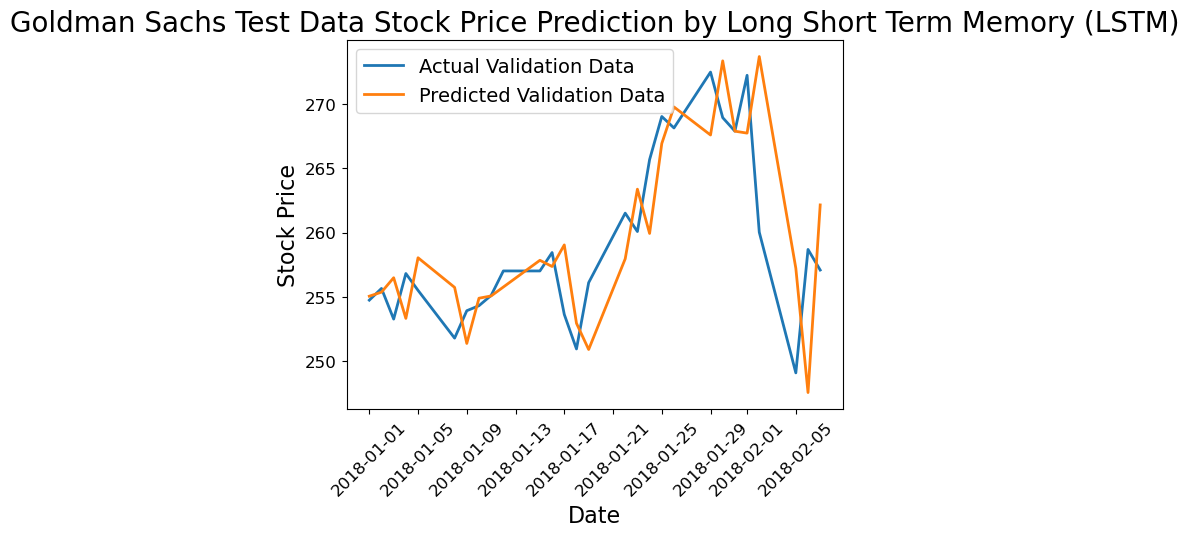

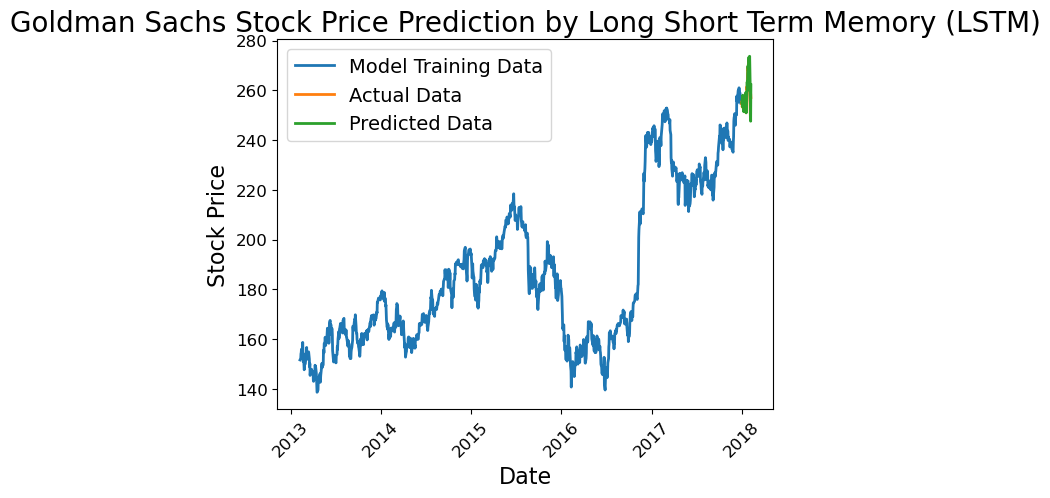

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━

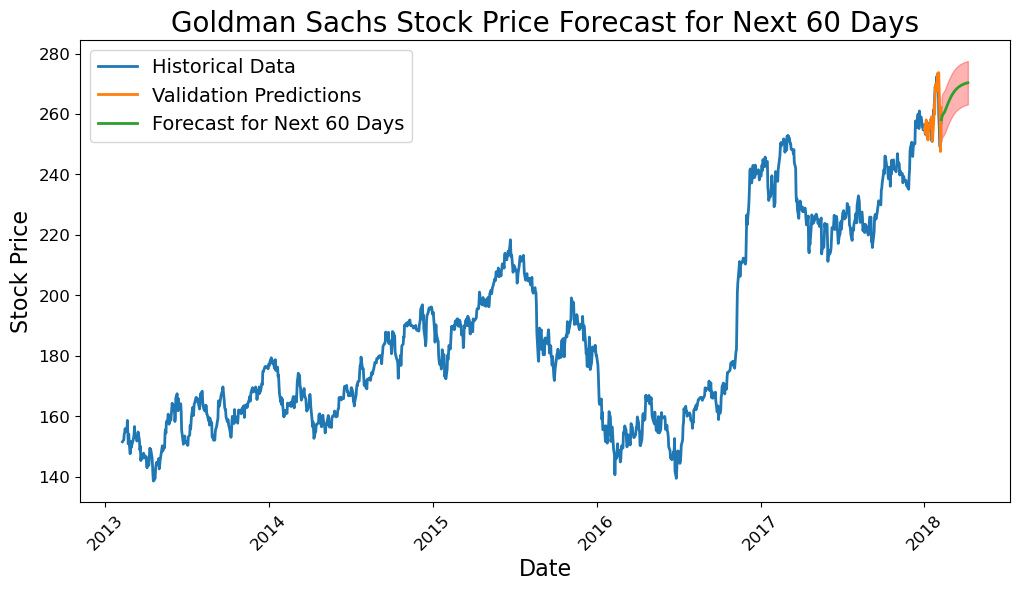

In [27]:
forecast_df, rms = lstm_prediction(gs_df, "Goldman Sachs")